In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import math
from PyUltraLight import *
import pyfftw
import os
import sys
import multiprocessing
import numpy
import numba
import h5py
from IPython.core.display import clear_output, display
%matplotlib inline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


axion_mass = 1e-22 *1.783e-36 #kg


# Set number of threads to target
num_threads = multiprocessing.cpu_count()

# Set units for soliton parameters
s_mass_unit = ''     #Accepted units: 'kg', 'solar_masses', 'M_solar_masses', and '' for dimensionless units
s_position_unit = '' #Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units
s_velocity_unit = '' #Accepted units: 'm/s', 'km/s', 'km/h', and '' for dimensionless units



# Set number of threads to target
num_threads = multiprocessing.cpu_count()

# Set units for soliton parameters
s_mass_unit = ''  
s_position_unit = ''        
s_velocity_unit = ''      
duration_units = ''         
length_units = ''          

# Set box size and resolution
length = 10  # 1 code unit is ~38 kpc x (1e-22/m_a)^0.5
length_units = ''  # Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units.
resol = 128  # It is recommended to check the upper bound on soliton mass for a given box size and resolution
duration = 0.1  # 1 code unit is ~70 Gyr (independent of axion mass assumption)
duration_units = ''  # Accepted units: 's', 'yr', 'kyr', 'Myr', and '' for dimensionless units
start_time = 0.0  # Should be given in the same units as duration. 
central_mass = 0.  # Give this parameter in the same units as the soliton mass unit. i.e. units must match with s_mass_unit

# Data to save
save_rho = True  # Saves density data for entire 3D simulation grid
save_psi = False  # Saves full complex field data for entire 3D simulation grid
save_plane = True  # Saves density data for plane z = 0
save_energies = True  # Saves integrated gravitational, kinetic and total energies as lists
save_line = True  # Saves density data for line y = 0, z = 0. Useful for examining interference patterns.

# Formats to save
hdf5 = False
npz = False
npy = True


m = 8 #1 code unit is ~2.3e6 M_sol (1e-22/m_a)^1.5
r = 2 #1 code unit is ~38 kpc x (1e-22/m_a)^0.5
#v = np.sqrt(central_mass/r)

#Soliton parameters are mass, position, velocity and phase (radians)
soliton1 = [m, [r,0,0], [0,0,0], 0]
soliton2 = [0, [0,0,0], [0,0,0], 0]

solitons = [soliton1,soliton2] 



step_factor = 1.  # Change this to a larger number if velocities are sufficiently low that constraint on timestep can be relaxed.
save_number = 10    # Choose number of 'frames' to save. Note that, depending on resolution, this could require significant disk space.
save_path = 'TestOutput'  # Set output directory

# Compile save options
save_options = [save_rho, save_psi, save_plane, save_energies, save_line]

# Call the evolve function
evolve(central_mass, num_threads, length, length_units, resol, duration, duration_units, step_factor,
       save_number, save_options, save_path, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons, start_time)




Complete.


In [2]:
save_path = 'TestOutput'  
for root, dirs, files in os.walk(save_path):
    for file in files:
        print(os.path.join(root, file))


TestOutput/README.md
TestOutput/timestamp.txt
TestOutput/2024.9.24_16:09:48_128/rho_#5.npy
TestOutput/2024.9.24_16:09:48_128/line_#1.npy
TestOutput/2024.9.24_16:09:48_128/config.txt
TestOutput/2024.9.24_16:09:48_128/plane_#1.npy
TestOutput/2024.9.24_16:09:48_128/plane_#3.npy
TestOutput/2024.9.24_16:09:48_128/line_#3.npy
TestOutput/2024.9.24_16:09:48_128/plane_#0.npy
TestOutput/2024.9.24_16:09:48_128/ekandqlist.npy
TestOutput/2024.9.24_16:09:48_128/plane_#7.npy
TestOutput/2024.9.24_16:09:48_128/plane_#9.npy
TestOutput/2024.9.24_16:09:48_128/rho_#4.npy
TestOutput/2024.9.24_16:09:48_128/plane_#8.npy
TestOutput/2024.9.24_16:09:48_128/rho_#8.npy
TestOutput/2024.9.24_16:09:48_128/line_#2.npy
TestOutput/2024.9.24_16:09:48_128/rho_#3.npy
TestOutput/2024.9.24_16:09:48_128/plane_#10.npy
TestOutput/2024.9.24_16:09:48_128/egpcmlist.npy
TestOutput/2024.9.24_16:09:48_128/line_#5.npy
TestOutput/2024.9.24_16:09:48_128/plane_#4.npy
TestOutput/2024.9.24_16:09:48_128/rho_#1.npy
TestOutput/2024.9.24_16:09

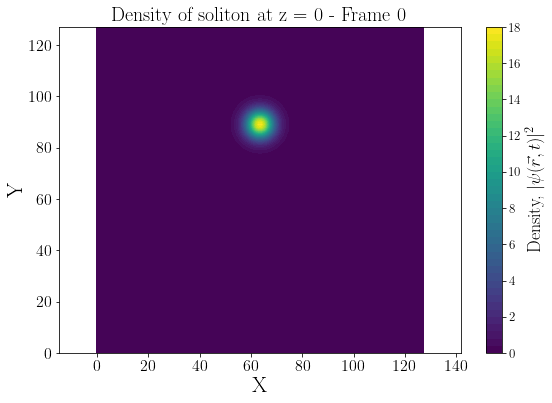

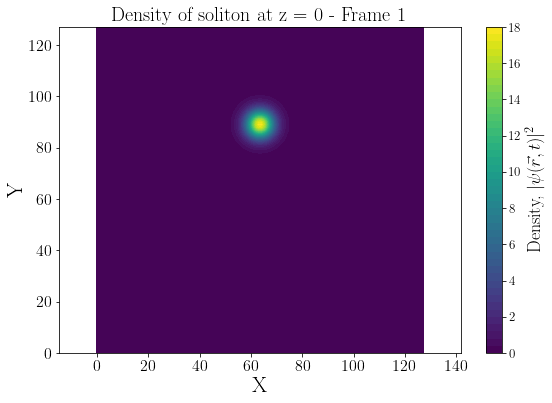

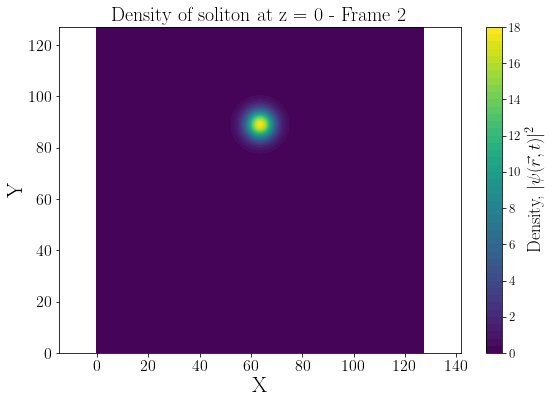

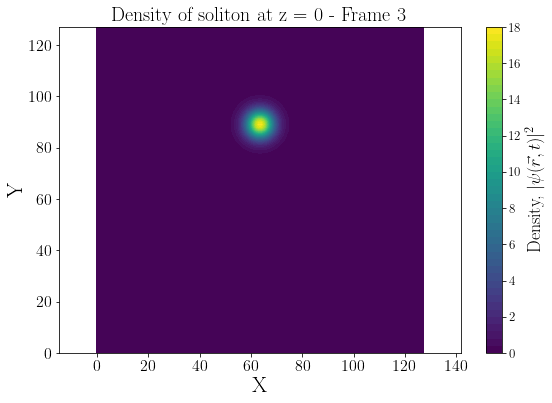

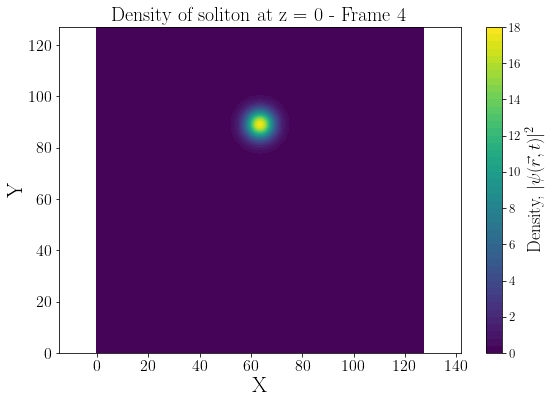

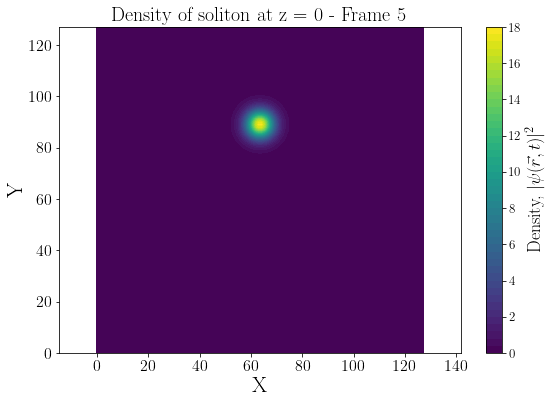

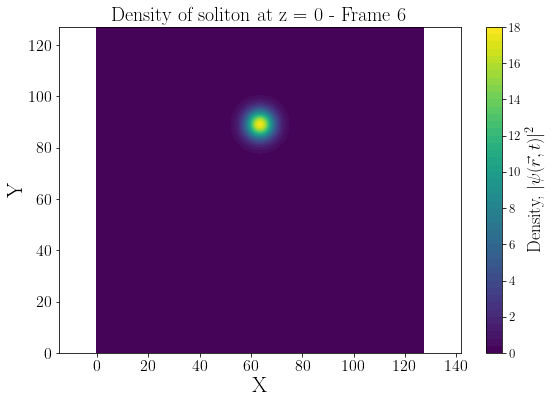

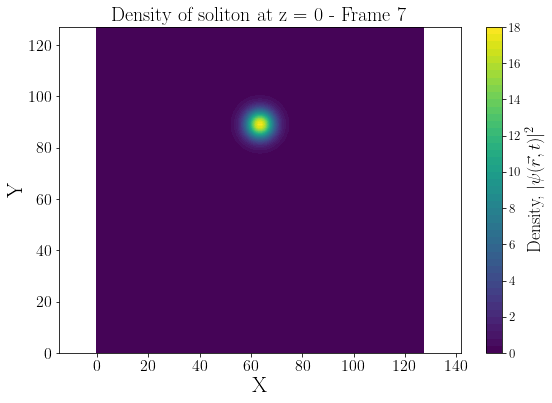

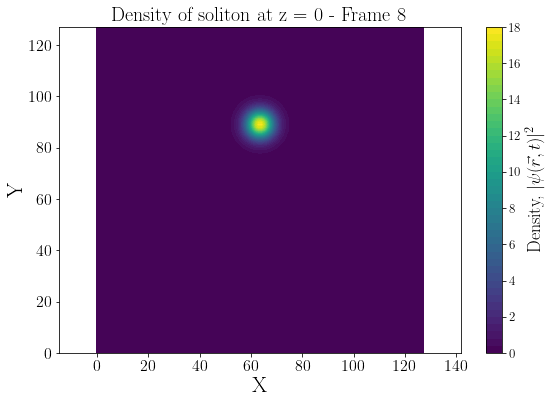

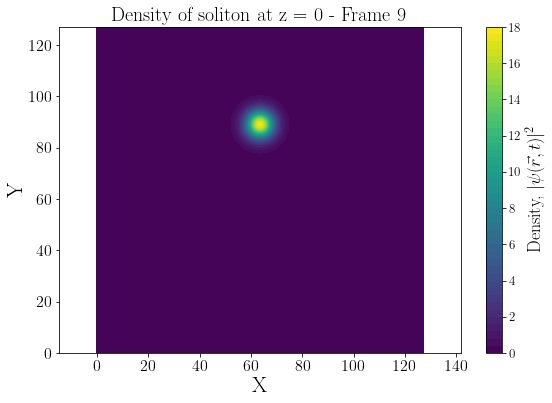

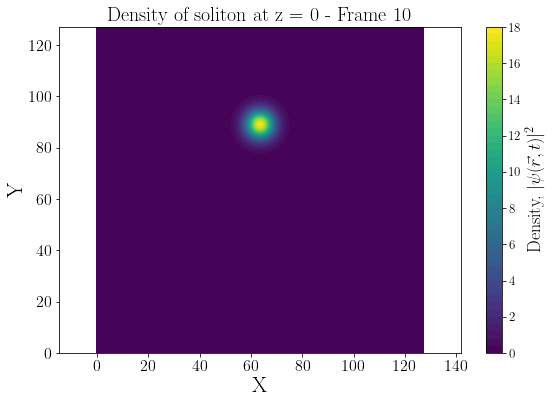

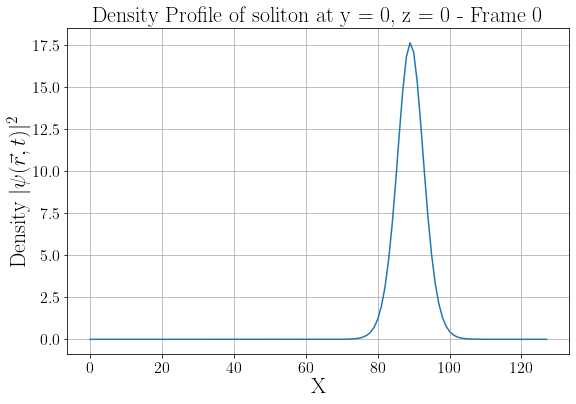

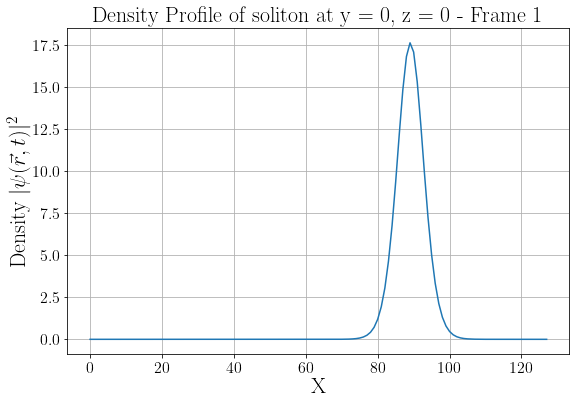

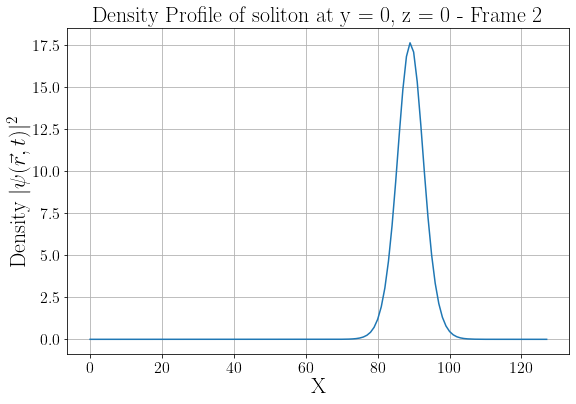

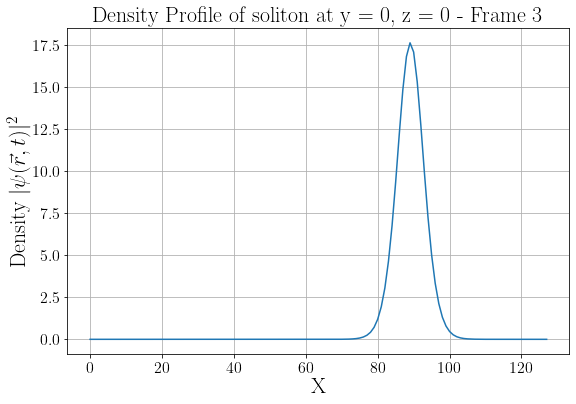

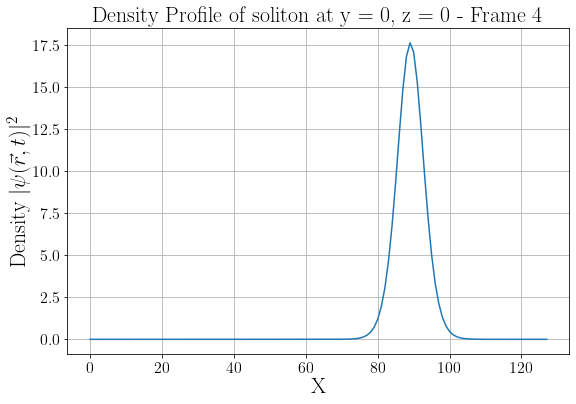

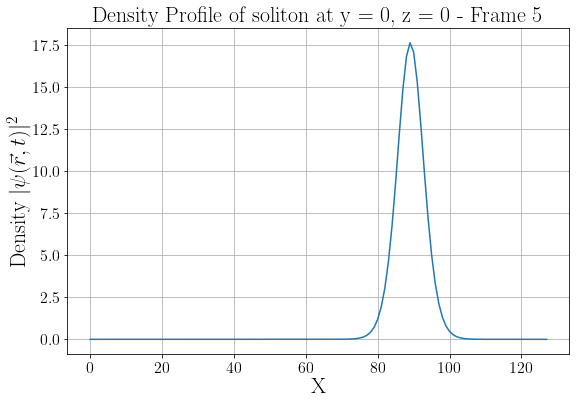

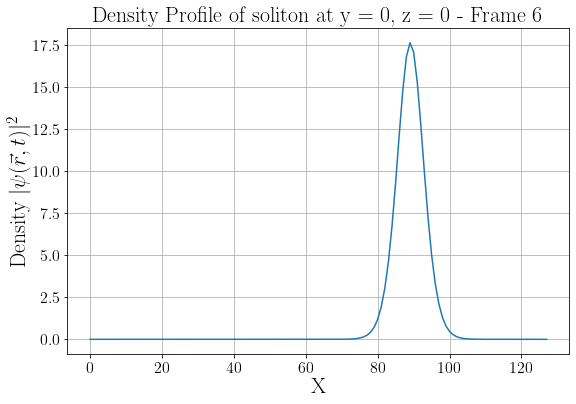

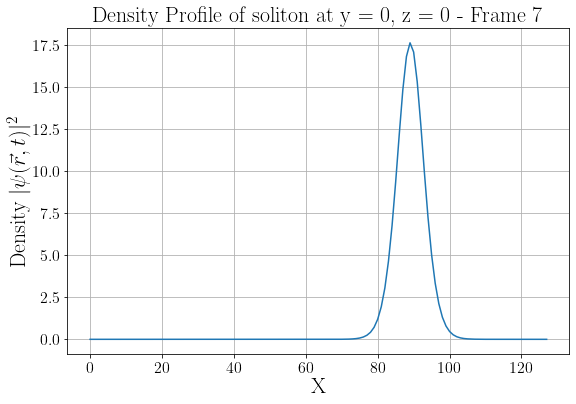

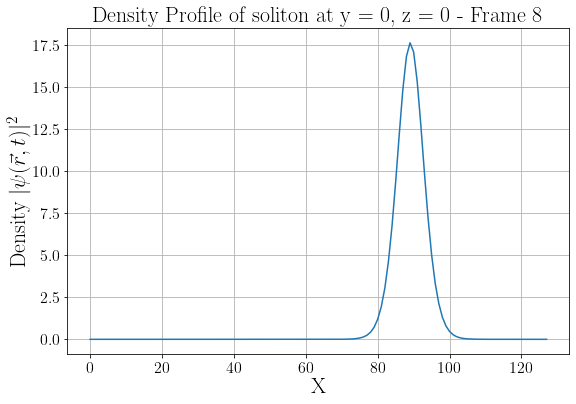

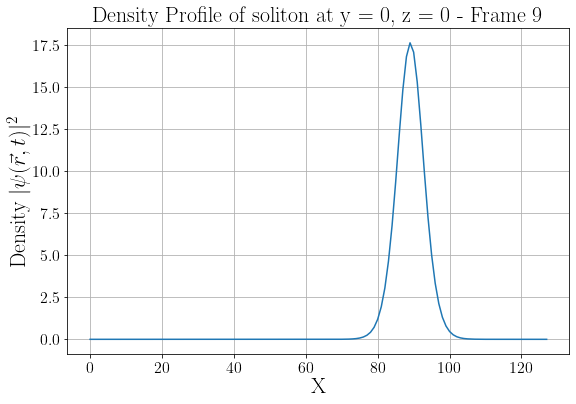

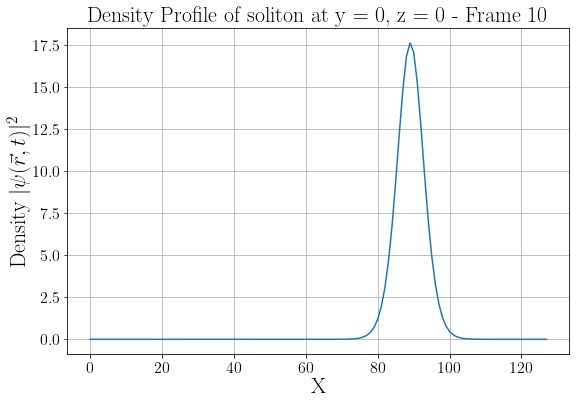

In [3]:
loc = 'TestOutput/2024.9.24_16:09:48_128/'  
rho_3D_list = []
rho_plane_z0_list = []
rho_line_y0_z0_list = []

save_number = 10 
for step in range(save_number + 1):
    try:
        rho_3D_data = np.load(os.path.join(loc, f'rho_#{step}.npy'))  
        rho_3D = rho_3D_list.append(rho_3D_data)
        
        
        rho_plane_z0_data = np.load(os.path.join(loc, f'plane_#{step}.npy'))  
        rho_plane_z0_list.append(rho_plane_z0_data)

        rho_line_y0_z0_data = np.load(os.path.join(loc, f'line_#{step}.npy')) 
        rho_line_y0_z0_list.append(rho_line_y0_z0_data)

    except FileNotFoundError:
        print(f"File not found for step {step}.")

        

visualisations_path = './Visualisations'
os.makedirs(visualisations_path, exist_ok=True)


for i, rho_plane in enumerate(rho_plane_z0_list):
    fig, ax = plt.subplots(1, figsize=(9, 6))
    cax = plt.contourf(rho_plane, levels=50, cmap='viridis') 
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize = 13)
    cbar.set_label(label=r'Density, $|\psi(\vec{r}, t)|^{2}$', size = 18)
    plt.title(f'Density of soliton at z = 0 - Frame {i}', fontsize = 20)
    plt.xlabel('X', fontsize = 22, labelpad = 2)
    plt.ylabel('Y', fontsize = 22, labelpad = 2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.axis('equal')
    plt.savefig(os.path.join(visualisations_path, f'density_plane_z0_frame_{i}.pdf'), dpi=300)
    plt.show()  

    
for i, rho_line in enumerate(rho_line_y0_z0_list):
    fig, ax = plt.subplots(1, figsize=(9, 6))
    plt.plot(rho_line, label='Density Profile at y = 0, z = 0')
    plt.xlabel('X', fontsize = 22, labelpad = 2)
    plt.ylabel(r'Density $|\psi(\vec{r}, t)|^{2}$', fontsize = 22, labelpad = 2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title(f'Density Profile of soliton at y = 0, z = 0 - Frame {i}', fontsize = 22)
    plt.grid()
    plt.savefig(os.path.join(visualisations_path, f'density_line_y0_z0_frame_{i}.pdf'), dpi=300)
    plt.show() 

In [8]:
central_mass = 10 * 1.989e30  # Give this parameter in the same units as the soliton mass unit. i.e. units must match with s_mass_unit

# Data to save
save_rho_pbh = True  # Saves density data for entire 3D simulation grid
save_psi_pbh = False  # Saves full complex field data for entire 3D simulation grid
save_plane_pbh = True  # Saves density data for plane z = 0
save_energies_pbh = True  # Saves integrated gravitational, kinetic and total energies as lists
save_line_pbh = True  # Saves density data for line y = 0, z = 0. Useful for examining interference patterns.


m = 8 #1 code unit is ~2.3e6 M_sol (1e-22/m_a)^1.5
r = 2 #1 code unit is ~38 kpc x (1e-22/m_a)^0.5
#v = np.sqrt(central_mass/r)

#Soliton parameters are mass, position, velocity and phase (radians)
soliton1 = [m, [r,0,0], [0,0,0], 0]
soliton2 = [0, [0,0,0], [0,0,0], 0]

solitons = [soliton1,soliton2] 



step_factor = 1.  # Change this to a larger number if velocities are sufficiently low that constraint on timestep can be relaxed.
save_number = 10    # Choose number of 'frames' to save. Note that, depending on resolution, this could require significant disk space.
save_path = 'TestOutput'  # Set output directory

# Compile save options
save_options = [save_rho_pbh, save_psi_pbh, save_plane_pbh, save_energies_pbh, save_line_pbh]


pbh_mass = 10 
# Call the evolve function
evolve(central_mass, num_threads, length, length_units, resol, duration, duration_units, step_factor,
       save_number, save_options, save_path, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons, start_time)




Complete.


In [9]:
save_path = 'TestOutput'
last_folder = max(
    [os.path.join(save_path, d) for d in os.listdir(save_path) if os.path.isdir(os.path.join(save_path, d))],
    key=os.path.getmtime,
    default=None
)
if last_folder:
    print(f"Last generated folder: {last_folder}")
    for file in os.listdir(last_folder):
        print(os.path.join(last_folder, file))
else:
    print("No folders found.")


Last generated folder: TestOutput/2024.9.24_16:14:22_128
TestOutput/2024.9.24_16:14:22_128/rho_#5.npy
TestOutput/2024.9.24_16:14:22_128/line_#1.npy
TestOutput/2024.9.24_16:14:22_128/config.txt
TestOutput/2024.9.24_16:14:22_128/plane_#1.npy
TestOutput/2024.9.24_16:14:22_128/plane_#3.npy
TestOutput/2024.9.24_16:14:22_128/line_#3.npy
TestOutput/2024.9.24_16:14:22_128/plane_#0.npy
TestOutput/2024.9.24_16:14:22_128/ekandqlist.npy
TestOutput/2024.9.24_16:14:22_128/plane_#7.npy
TestOutput/2024.9.24_16:14:22_128/plane_#9.npy
TestOutput/2024.9.24_16:14:22_128/rho_#4.npy
TestOutput/2024.9.24_16:14:22_128/plane_#8.npy
TestOutput/2024.9.24_16:14:22_128/rho_#8.npy
TestOutput/2024.9.24_16:14:22_128/line_#2.npy
TestOutput/2024.9.24_16:14:22_128/rho_#3.npy
TestOutput/2024.9.24_16:14:22_128/plane_#10.npy
TestOutput/2024.9.24_16:14:22_128/egpcmlist.npy
TestOutput/2024.9.24_16:14:22_128/line_#5.npy
TestOutput/2024.9.24_16:14:22_128/plane_#4.npy
TestOutput/2024.9.24_16:14:22_128/rho_#1.npy
TestOutput/2024

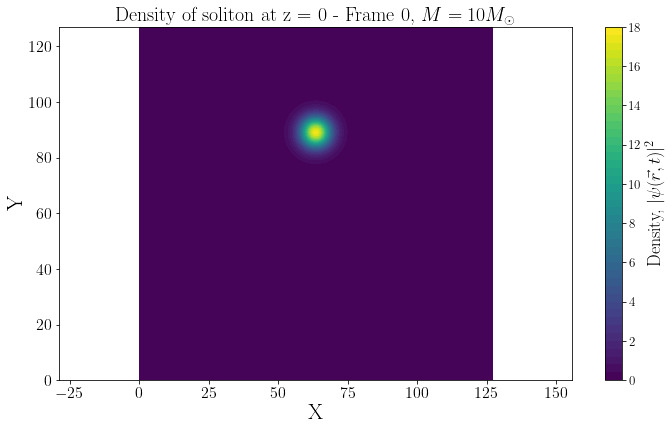

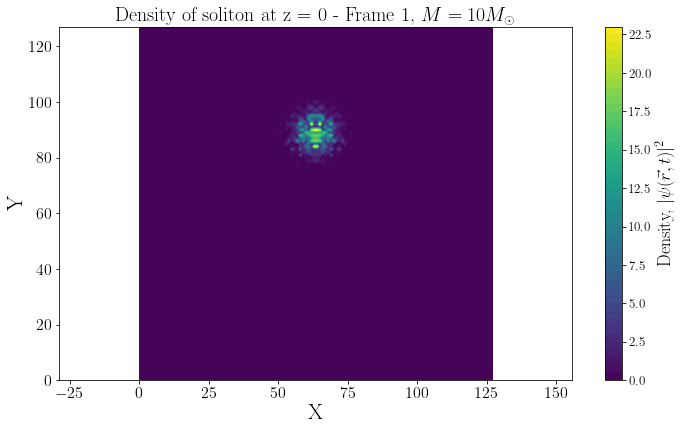

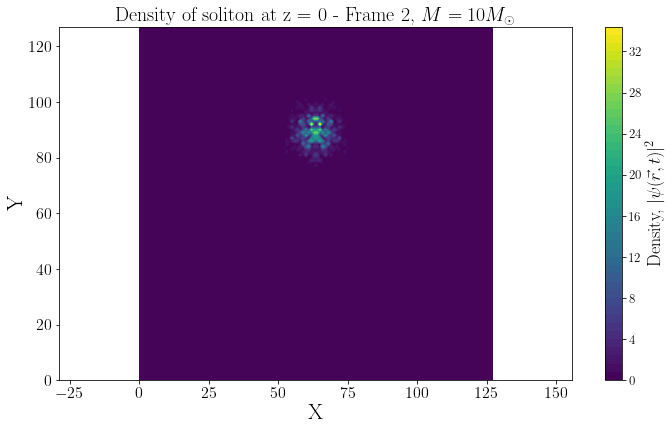

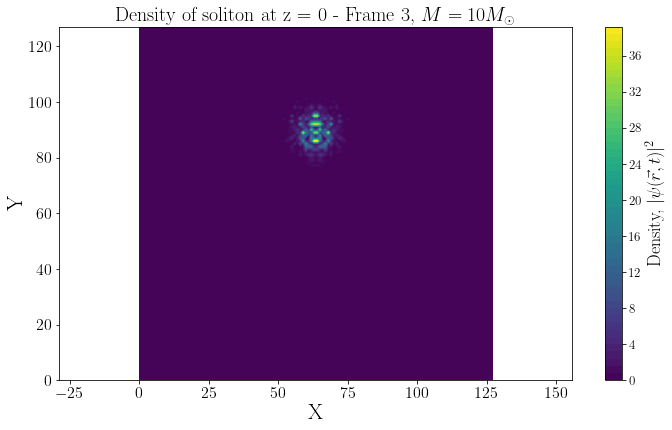

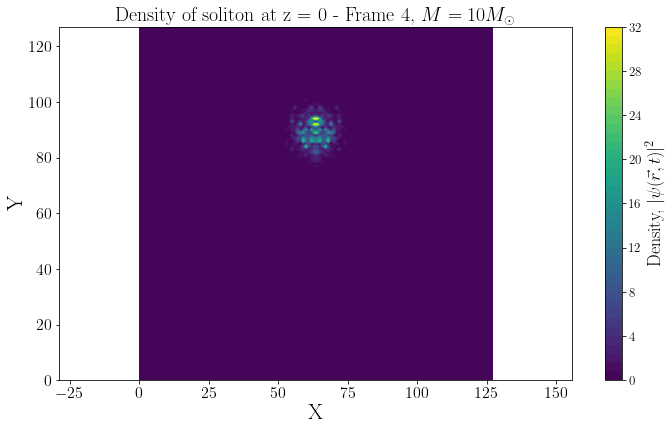

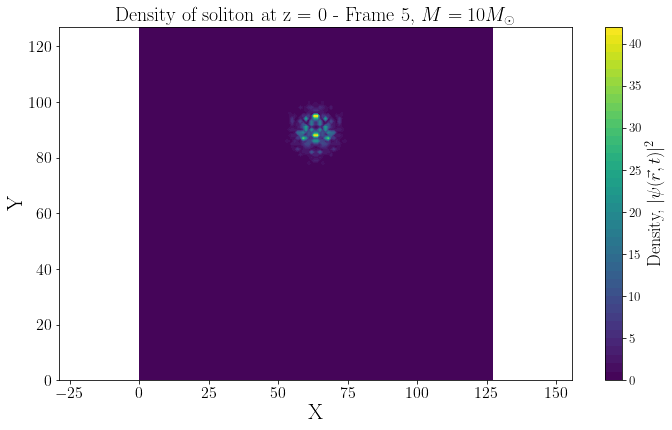

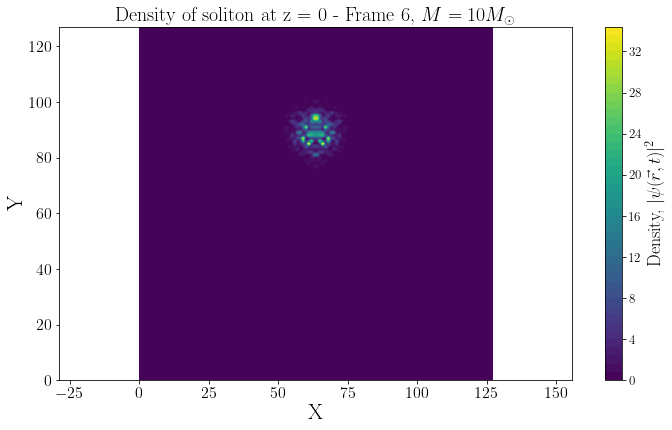

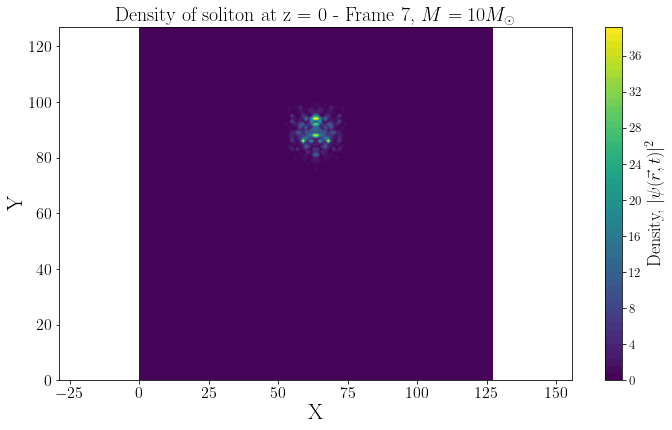

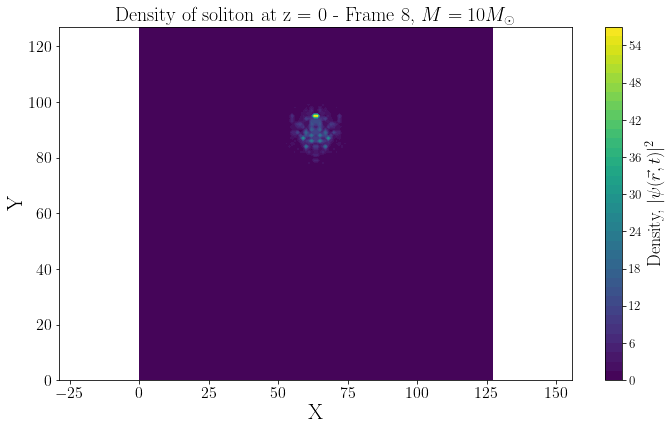

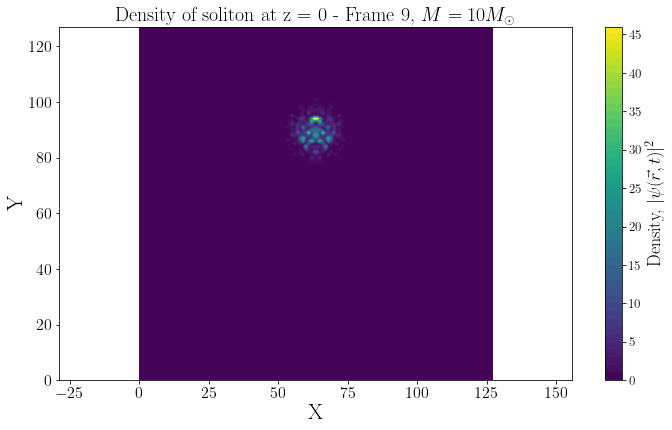

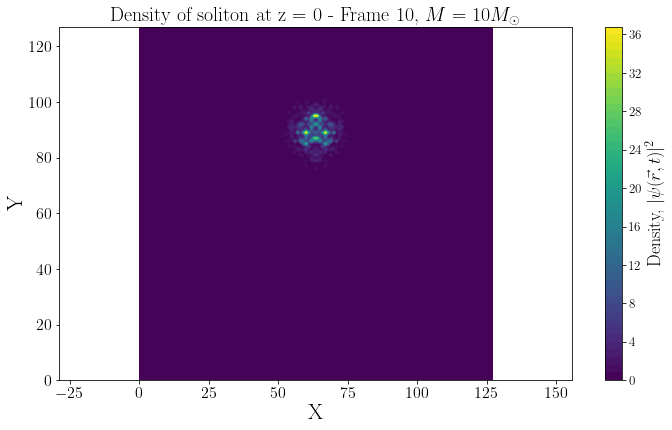

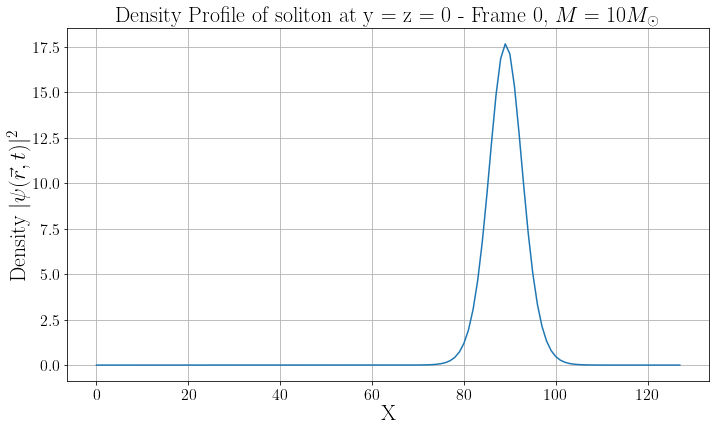

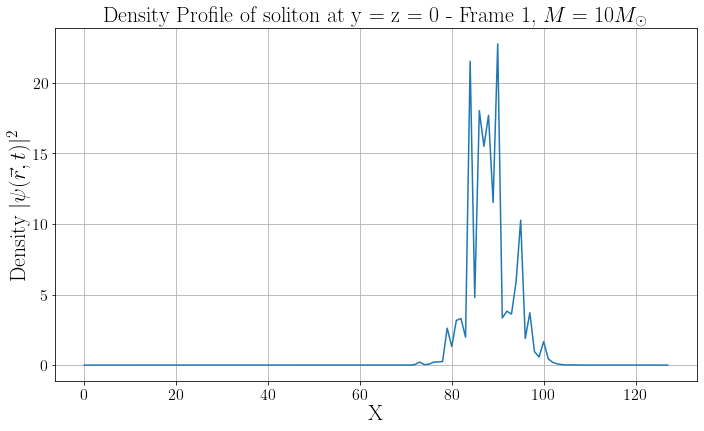

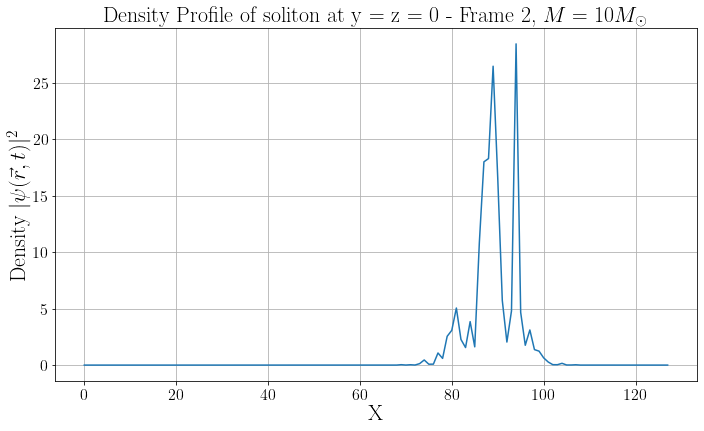

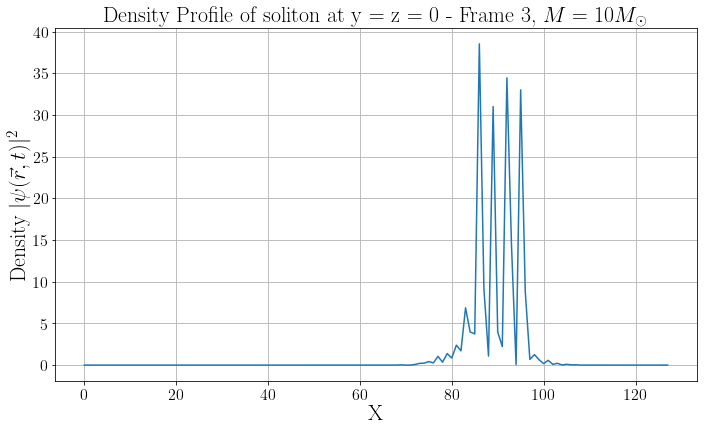

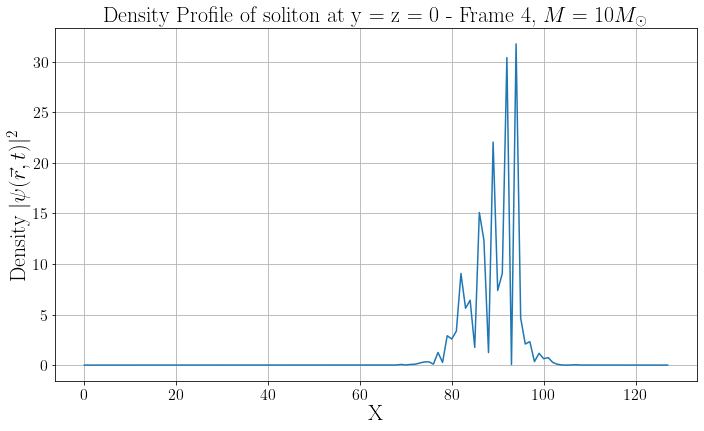

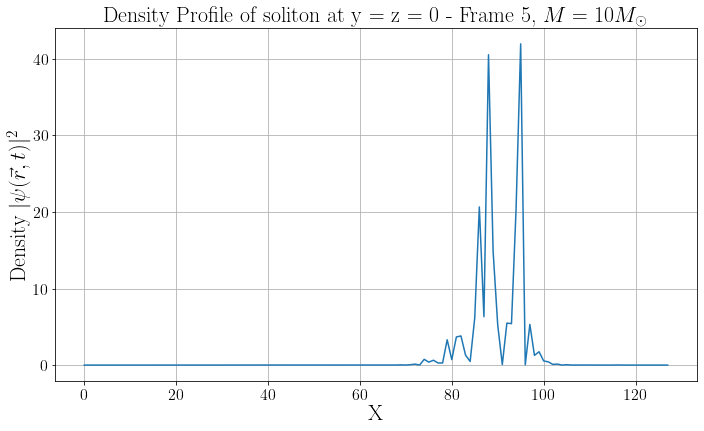

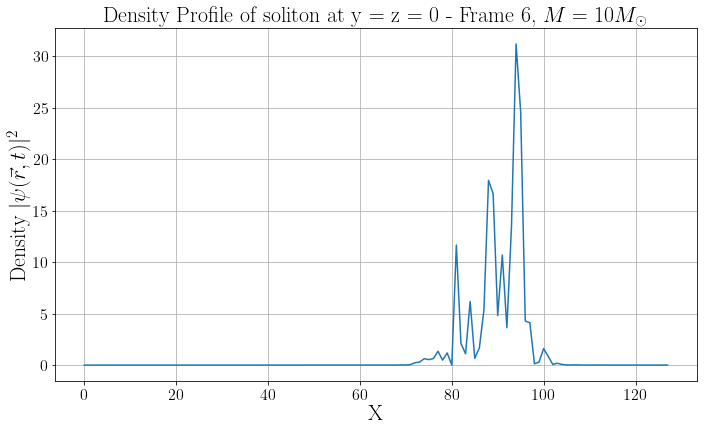

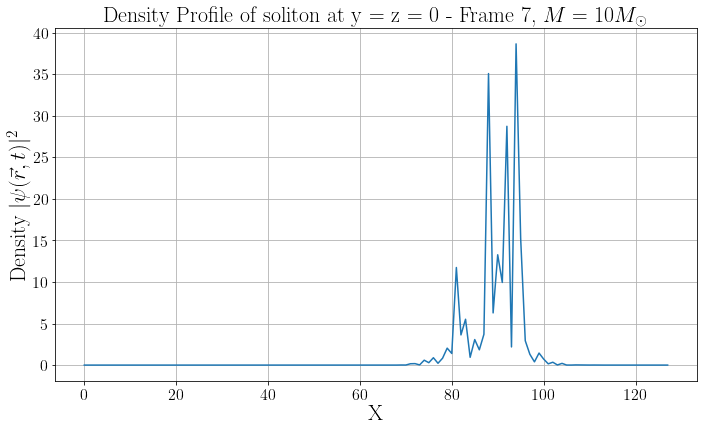

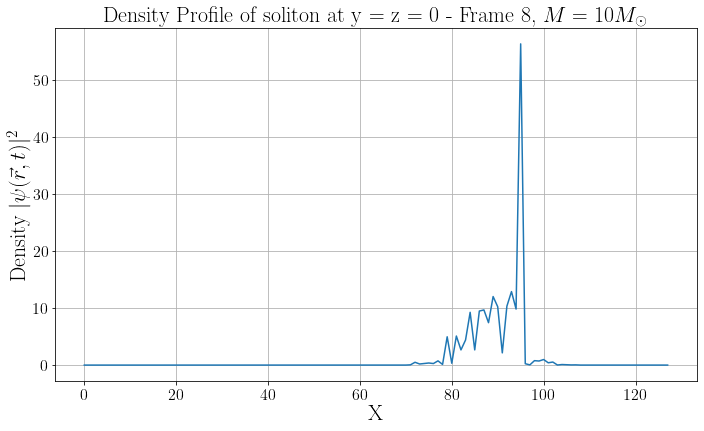

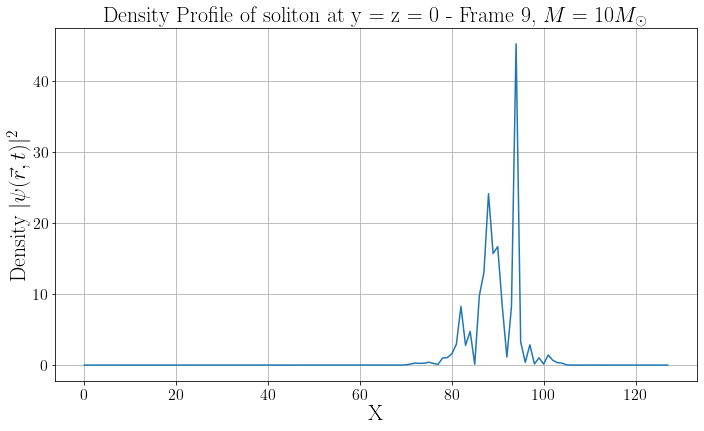

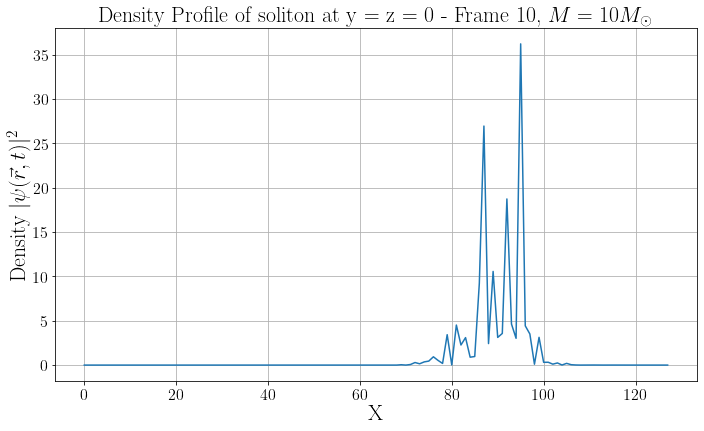

In [10]:
loc = 'TestOutput/2024.9.24_16:14:22_128/'   
rho_3D_list = []
rho_plane_z0_list = []
rho_line_y0_z0_list = []

save_number = 10 
for step in range(save_number + 1):
    try:
        rho_3D_data = np.load(os.path.join(loc, f'rho_#{step}.npy'))  
        rho_3D_list.append(rho_3D_data)

        rho_plane_z0_data = np.load(os.path.join(loc, f'plane_#{step}.npy'))  
        rho_plane_z0_list.append(rho_plane_z0_data)

        rho_line_y0_z0_data = np.load(os.path.join(loc, f'line_#{step}.npy')) 
        rho_line_y0_z0_list.append(rho_line_y0_z0_data)

    except FileNotFoundError:
        print(f"File not found for step {step}.")

        

visualisations_path = './Visualisations'
os.makedirs(visualisations_path, exist_ok=True)


for i, rho_plane in enumerate(rho_plane_z0_list):
    fig, ax = plt.subplots(1, figsize = (11.5, 6.5))
    cax = plt.contourf(rho_plane, levels = 50, cmap = 'viridis') 
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize = 13)
    cbar.set_label(label=r'Density, $|\psi(\vec{r}, t)|^{2}$', size = 18)
    plt.title(f'Density of soliton at z = 0 - Frame {i}, $M = 10 M_\odot$', fontsize = 20)
    plt.xlabel('X', fontsize = 22, labelpad = 2)
    plt.ylabel('Y', fontsize = 22, labelpad = 2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.axis('equal')
    plt.savefig(os.path.join(visualisations_path, f'densitypbh_plane_z0_frame_{i}.pdf'), dpi=300)
    plt.show()  

    
for i, rho_line in enumerate(rho_line_y0_z0_list):
    fig, ax = plt.subplots(1, figsize = (11.5, 6.5))
    plt.plot(rho_line, label = 'Density Profile at y = z = 0')
    plt.xlabel('X', fontsize = 22, labelpad = 2)
    plt.ylabel(r'Density $|\psi(\vec{r}, t)|^{2}$', fontsize = 22, labelpad = 2)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title(f'Density Profile of soliton at y = z = 0 - Frame {i}, $M = 10 M_\odot$', fontsize = 22)
    plt.grid()
    plt.savefig(os.path.join(visualisations_path, f'densitypbh_line_y0_z0_frame_{i}.pdf'), dpi=300)
    plt.show() 